In [4]:
#Import statements required for some code functionality 
#Implementing web scraping in python with beautifulsoup. (2020, August 20). Retrieved March 11, 2021, from https://www.geeksforgeeks.org/implementing-web-scraping-python-beautiful-soup/
#J. (2016, March 12). Check if certain value is contained in a dataframe column in pandas. Retrieved February 28, 2021, from https://stackoverflow.com/questions/35956712/check-if-certain-value-is-contained-in-a-dataframe-column-in-pandas
#Seif, G. (2018, March 01). 5 quick and easy data visualizations in Python with code. Retrieved March 13, 2021, from https://towardsdatascience.com/5-quick-and-easy-data-visualizations-in-python-with-code-a2284bae952f
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


years = [2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

#Empty lists to grab player names and cities in upcoming loop
names = []
cities = []


#Creates multiple empty lists for each stat that will be added to the CSV file for each player

gp = []
minutes = []
points = []
fgm = []
fga = []
fgperc = []
threepm = []
threepa = []
threepperc = []
ftm = []
fta = []
ftperc =[]
reb = []
ast = []
stl = []
blk = []
to = []
dd2 = []
td3 = []
perc = []
position = []

basketball = {}

theYears = []

for year in years:
	
	url = "https://www.espn.com/nba/stats/player/_/season/" + str(year) + "/seasontype/2/table/offensive/sort/avgPoints/dir/desc"
	
	#Grabs Top 50 NBA players based on Points per Game (PPG) from ESPN.com
	#Implementing web scraping in python with beautifulsoup. (2020, August 20). Retrieved March 11, 2021, from https://www.geeksforgeeks.org/implementing-web-scraping-python-beautiful-soup/
	#2020-21 NBA player stats. (n.d.). Retrieved March 07, 2021, from https://www.espn.com/nba/stats/player/_/table/offensive/sort/avgPoints/dir/desc
	#Code to send HTTP request to website and grab URL using Beautiful Soup
	page = requests.get(url) ##Implementing web scraping in python with beautifulsoup. (2020, August 20). Retrieved March 11, 2021, from https://www.geeksforgeeks.org/implementing-web-scraping-python-beautiful-soup/
	soup = BeautifulSoup(page.content, 'html.parser') #Implementing web scraping in python with beautifulsoup. (2020, August 20). Retrieved March 11, 2021, from https://www.geeksforgeeks.org/implementing-web-scraping-python-beautiful-soup/


	#Grab the table of data on the webpage that is encompased by the below id
	results = soup.find(id="fittPageContainer") #Breuss, M. (2021, March 06). Beautiful soup: Build a web scraper with python. Retrieved March 07, 2021, from https://realpython.com/beautiful-soup-web-scraper-python/#part-3-parse-html-code-with-beautiful-soup

	#Grab the following tag information from the HTML on the webpage assoicated with player names and their assoicated stats
	players = results.find_all('tr', class_= "Table__TR Table__TR--sm Table__even") #Breuss, M. (2021, March 06). Beautiful soup: Build a web scraper with python. Retrieved March 07, 2021, from https://realpython.com/beautiful-soup-web-scraper-python/#part-3-parse-html-code-with-beautiful-soup
	stats = results.find_all('td', class_ = "Table__TD") #Breuss, M. (2021, March 06). Beautiful soup: Build a web scraper with python. Retrieved March 07, 2021, from https://realpython.com/beautiful-soup-web-scraper-python/#part-3-parse-html-code-with-beautiful-soup

	#Counter to help bypass unnecessary data for upcoming loop
	num = 1

	#Loops through each player in the web page for the associated HTML tags and grabs the name and city of the player's team
	for player in players:

		#name = player.find('tbody',class_='Table__TBODY')
		#Finds the name of each player and the city of their team within the specifed HTML tags on the website 
		name = player.find('a',class_= "AnchorLink") #Breuss, M. (2021, March 06). Beautiful soup: Build a web scraper with python. Retrieved March 07, 2021, from https://realpython.com/beautiful-soup-web-scraper-python/#part-3-parse-html-code-with-beautiful-soup
		city = player.find('span', class_ = "pl2 n10 athleteCell__teamAbbrev") #Breuss, M. (2021, March 06). Beautiful soup: Build a web scraper with python. Retrieved March 07, 2021, from https://realpython.com/beautiful-soup-web-scraper-python/#part-3-parse-html-code-with-beautiful-soup

		#Passes any element that has nothing in it and continues the loop
		if None in (name, city): #Breuss, M. (2021, March 06). Beautiful soup: Build a web scraper with python. Retrieved March 07, 2021, from https://realpython.com/beautiful-soup-web-scraper-python/#part-3-parse-html-code-with-beautiful-soup
			continue

		#Adds the player's name and their team city to the appropriate list while grabing the text, instead of the HTML, and removing whitespace
		names.append(name.text.strip()) #Breuss, M. (2021, March 06). Beautiful soup: Build a web scraper with python. Retrieved March 07, 2021, from https://realpython.com/beautiful-soup-web-scraper-python/#part-3-parse-html-code-with-beautiful-soup
		cities.append(city.text.strip()) #Breuss, M. (2021, March 06). Beautiful soup: Build a web scraper with python. Retrieved March 07, 2021, from https://realpython.com/beautiful-soup-web-scraper-python/#part-3-parse-html-code-with-beautiful-soup


	#Create a list that contains the possible positions in the ESPN data
	#The list is used as a indicator of when the next player's stats can be collected 
	listPos = ["G", "PG", "SG", "F", "SF", "PF", "C", "NA"]

	indStats = [] #Create a list that grabs each player's stats until a position name comes up
	playerStats = [] #Create a master list for all players (a list of lists)


	#Create a for loop that goes through each players stats
	#For loop will bypass any unnecessary data - about 100 rows need to be bypassed for this script
	#Once the needed data is reached, an if statement looks to see if the data is the position of the player. If it is the position of the player, this means that all the players stats have been collected in indStats and can be added to the master list playerStats (which will be a list of list)
	#Once a player's stats are added to the master list, the indStats list gets cleared
	#The else statement will add the player's stats into the indStats list (means that the current item is a stat we need)

	for stat in stats:

		if num > 101:
			#print(stat.text)
			if stat.text in listPos:
				playerStats.append(indStats)
				indStats = []
				continue
			else:
				indStats.append(stat.text)
		else:
			num += 1 #Increases counter by one


	#Adds the last player to the master list because the data does not end on a player position so it does not know to add the last player to the loop
	playerStats.append(indStats)

	#print(indStats)
	#print(playerStats)

	#print(names)

	#Creates a counter
	i = 0 
	#Creates a dictionary 
	#basketball = {}

	#basketball = {{names[i]: playerStats[i]} for name in names (i = i + 1) }

	#While loop will perform the encompassed function as long as the counter is below 50; want to grab the 50 elements from the names list and playerStats list

	while i < 50: 

		basketball[names[i]] = playerStats[i] #Adds to the dictionary using the player's name as a key and their list of stats as the value
		i += 1 #Increases counter by 1


	values = [] #Creates an empty list to grab the stats of each player in a list of lists

	#Loops through the basketball dictionary (of only the values) and adds them to the values list

	for ball in basketball.values():
		values.append(ball)
		#print(len(values))

	#print(values)

	#Creates multiple empty lists for each stat that will be added to the CSV file for each player

	#Loops through each list in the list values (list of list) and takes each stat and appends them to the appropriate list for each player
	#Values grabbed are float casted to convert into continous data and allow for the mean function to work later on
	#Data is organized in a way that allows us to know where each value will be and match it to the players (since the data is ordered)

	for value in values:

		gp.append(float(value[0]))
		minutes.append(float(value[1]))
		points.append(float(value[2]))
		fgm.append(float(value[3]))
		fga.append(float(value[4]))
		fgperc.append(float(value[5]))
		threepm.append(float(value[6]))
		threepa.append(float(value[7]))
		threepperc.append(float(value[8]))
		ftm.append(float(value[9]))
		fta.append(float(value[10]))
		ftperc.append(float(value[11]))
		reb.append(float(value[12]))
		ast.append(float(value[13]))
		stl.append(float(value[14]))
		blk.append(float(value[15]))
		to.append(float(value[16]))
		dd2.append(float(value[17]))
		td3.append(float(value[18]))
		perc.append(float(value[19]))



	count  = 1 #Counter to bypass any unncessary data for upcoming loop
	#position = [] #Empty list for to grab each player's position in upcoming loop

	#Loops through to the Web Page to find the position of each player
	#Skips any data that is unnecessary with counter
	#In the second if statement, if the player's position starts with P or S, that indicates a two letter position (PG, PF, SG, SF) and the first two indexes need to be grabbed
	#Otherwise just grab the first index 
	#Else statement increases counter

	for player in players:
		
		#print(player.text.strip() + '\n')
		if count > 50:
			#print(player.text.strip())
			#Grab the position of the player
			if player.text[0] == "N": #Data cleaning to get rid of NA value in position of a particular player
				position.append("C")
			elif player.text[0] == "P" or player.text[0] == "S":
				position.append(player.text[0] + player.text[1])
			else: 
				position.append(player.text[0])	

		else:
			count += 1

	#print(names)
	#print(cities)
	#print(position)

	i = 0

	while i < 50:

		theYears.append(year)
		i += 1


# #Place the data into a CSV file

# #Hiremath, O. S. (2020, November 25). Web scraping with python - a beginner's guide. Retrieved March 07, 2021, from https://www.edureka.co/blog/web-scraping-with-python/
# #Places data into a dataframe and exports it to a CSV file
df = pd.DataFrame({'Player Name':names, 'Cities': cities, 'Position': position, 'Season':theYears,'Games Played': gp, 'Minutes Played Per Game': minutes, 'Points Per Game': points, 'Average Field Goals made': fgm, 'Average Field Goals Attempted': fga, 'Field Goal Percentage': fgperc, 'Average 3-Point Field Goals Made': threepm, 'Average 3-Point Field Goals Attempted': threepa, '3-Point Field Goal Percentage': threepperc, 'Average Free Throws Made': ftm, 'Average Free Throws Attempted': fta, 'Free Throw Percentage': ftperc, 'Rebounds Per Game': reb, 'Assists Per Game': ast, 'Steals Per Game': stl,'Blocks Per Game': blk, 'Turnovers Per Game': to, 'Double Double': dd2, 'Triple Double': td3, 'Player Efficiency Rating': perc} )
df.to_csv('nba.csv', index=False, encoding = 'utf-8') #Creates a CSV file with each key as the header and value as the columns from previous line of code

#Read CSV file back into python script - NOTE: COMMENT OUT THE FOLLOWING LINE TO ALLOW THE SCRIPT TO WORK ON YOUR OWN COMPUTER
#df = pd.read_csv("/Users/rsemunegus/Desktop/cs5010/hw/nba.csv")






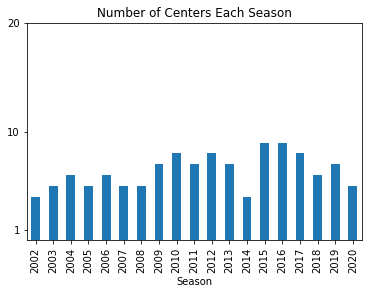

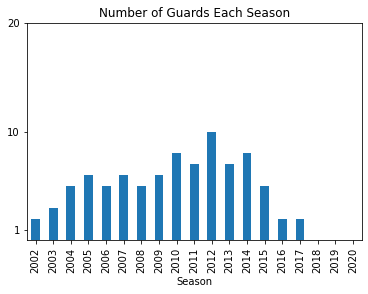

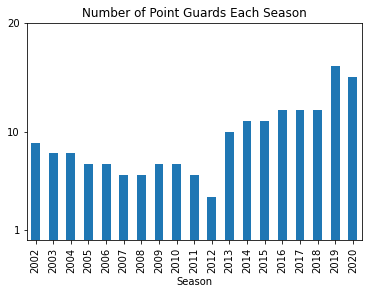

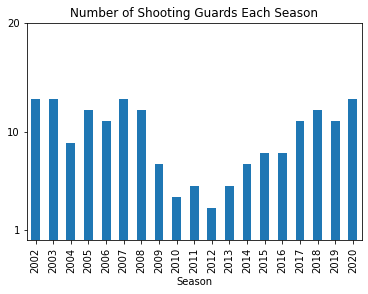

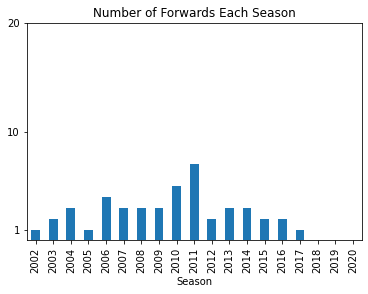

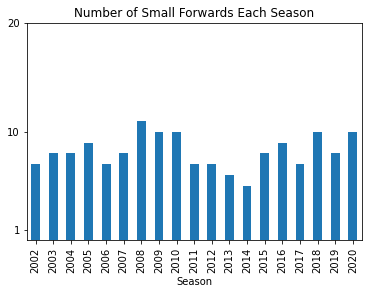

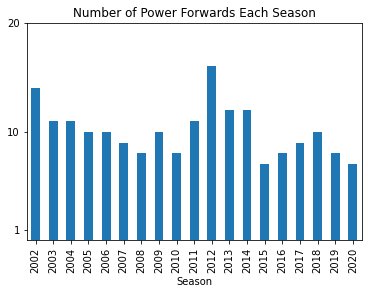

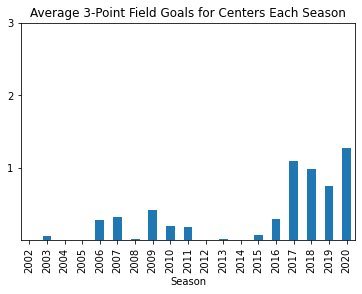

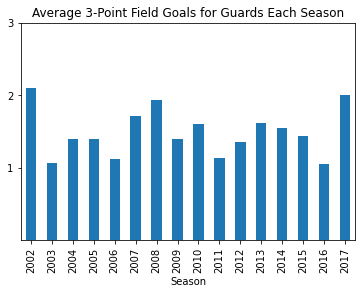

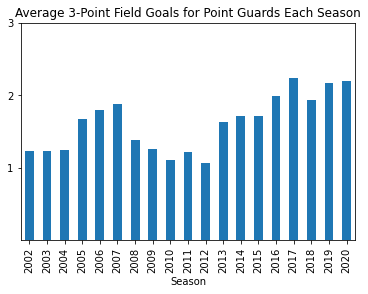

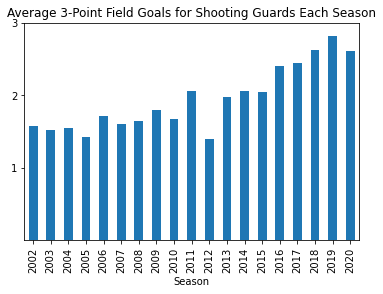

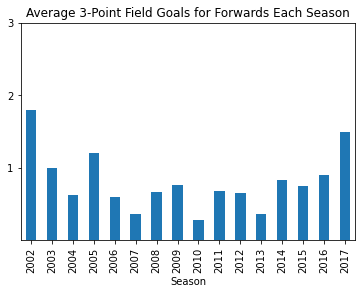

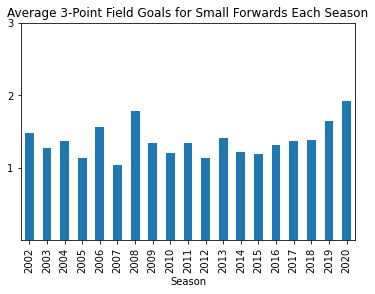

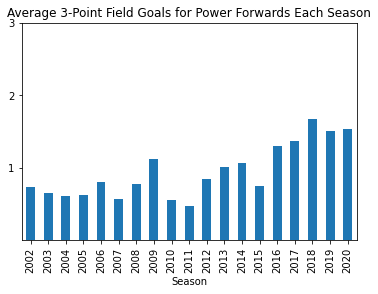

In [5]:
#Read CSV file back into python script - NOTE: COMMENT OUT THE FOLLOWING LINE TO ALLOW THE SCRIPT TO WORK ON YOUR OWN COMPUTER
#df = pd.read_csv("/Users/rsemunegus/Desktop/cs5010/hw/nba.csv")

### Manpreet's ###

#finding average 3-point field goals by Season and Position
allseasons =df.groupby(['Position','Season']).mean()['Average 3-Point Field Goals Made']

C3n = allseasons.xs("C",axis=0)
G3n = allseasons.xs("G",axis=0)
PG3n = allseasons.xs("PG",axis=0)
SG3n = allseasons.xs("SG",axis=0)
F3n = allseasons.xs("F",axis=0)
SF3n = allseasons.xs("SF",axis=0)
PF3n = allseasons.xs("PF",axis=0)

#Finding the number of players of each position for each season

#Counts = df.groupby('Season')['Position'].value_counts()

Final = df.groupby('Season')['Position'].value_counts().unstack().fillna(0)
#https://towardsdatascience.com/pandas-tips-and-tricks-33bcc8a40bb9
#https://towardsdatascience.com/pandas-tips-and-tricks-33bcc8a40bb9
#http://pytolearn.csd.auth.gr/b4-pandas/40/plotserdf.html
#https://realpython.com/pandas-groupby/

C = Final.xs('C', axis=1)
G = Final.xs('G', axis=1)
PG= Final.xs('PG', axis=1)
SG = Final.xs('SG', axis=1)
F = Final.xs('F', axis=1)
SF = Final.xs('SF', axis=1)
PF = Final.xs('PF', axis=1)

#bar plot for number of each position each season 
p1 = C.plot(kind='bar', title='Number of Centers Each Season', yticks=[1, 10, 20])
plt.show()
p2 = G.plot(kind='bar', title='Number of Guards Each Season', yticks=[1, 10, 20])
plt.show()
p3 = PG.plot(kind='bar', title='Number of Point Guards Each Season', yticks=[1, 10, 20])
plt.show()
p4 = SG.plot(kind='bar', title='Number of Shooting Guards Each Season', yticks=[1, 10, 20])
plt.show()
p5 = F.plot(kind='bar', title='Number of Forwards Each Season', yticks=[1, 10, 20])
plt.show()
p6 = SF.plot(kind='bar', title='Number of Small Forwards Each Season', yticks=[1, 10, 20])
plt.show()
p7 = PF.plot(kind='bar', title='Number of Power Forwards Each Season', yticks=[1, 10, 20])
plt.show()

#bar plot for average 3-point field goals for each position
p8 = C3n.plot(kind='bar', title='Average 3-Point Field Goals for Centers Each Season', yticks=[1, 2, 3])
plt.show()
p9 = G3n.plot(kind='bar', title='Average 3-Point Field Goals for Guards Each Season', yticks=[1, 2, 3])
plt.show()
p10 = PG3n.plot(kind='bar', title='Average 3-Point Field Goals for Point Guards Each Season', yticks=[1, 2, 3])
plt.show()
p11 = SG3n.plot(kind='bar', title='Average 3-Point Field Goals for Shooting Guards Each Season', yticks=[1, 2, 3])
plt.show()
p12 = F3n.plot(kind='bar', title='Average 3-Point Field Goals for Forwards Each Season', yticks=[1, 2, 3])
plt.show()
p13 = SF3n.plot(kind='bar', title='Average 3-Point Field Goals for Small Forwards Each Season', yticks=[1, 2, 3])
plt.show()
p14 = PF3n.plot(kind='bar', title='Average 3-Point Field Goals for Power Forwards Each Season', yticks=[1, 2, 3])
plt.show()

950
950
The top player selected for points was James Harden who averaged 36.1 points per game in the 2018-2019 season as a SG


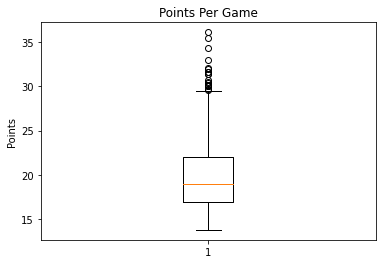

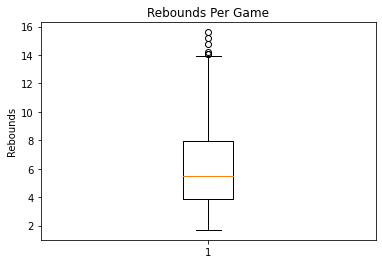

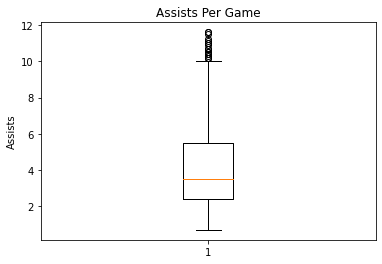

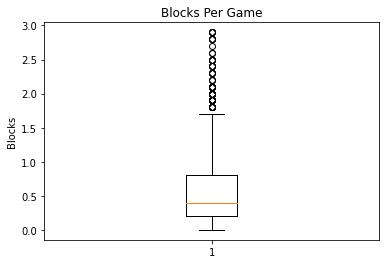

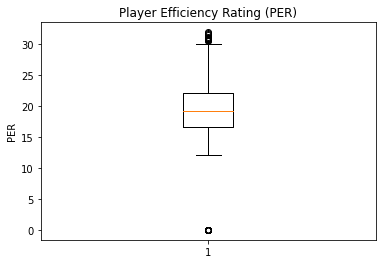

The top player selected for rebounds was Andre Drummond who averaged 15.6 rebounds per game in the 2018-2019 season as a C
The top player selected for assists was Steve Nash who averaged 11.6 assists per game in the 2006-2007 season as a PG
The top player selected for blocks was Tim Duncan who averaged 2.9 blocks per game in the 2002-2003 season as a C
The top player selected for PER was Giannis Antetokounmpo who had a 31.94 PER in the 2019-2020 season as a PF
Based on the dataset and using the criteria of PPG, RPG, APG, BPG, and PER, the 5 players on my team would be James Harden, Andre Drummond, Steve Nash, Tim Duncan, Giannis Antetokounmpo
Kevin Garnett - 2004 MVP Stats
Points: 24.2
Assists: 5.0
Rebounds: 13.9
Steals: 1.5
Blocks: 2.2
PER: 29.5


LeBron James - 2004 Stats
Points: 20.9
Assists: 5.9
Rebounds: 5.5
Steals: 1.6
Blocks: 0.7
PER: 18.3




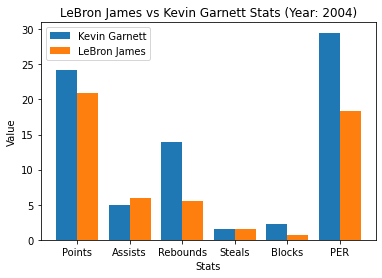

Steve Nash - 2005 MVP Stats
Points: 15.5
Assists: 11.5
Rebounds: 3.3
Steals: 1.0
Blocks: 0.1
PER: 22.04


LeBron James - 2005 Stats
Points: 27.2
Assists: 7.2
Rebounds: 7.4
Steals: 2.2
Blocks: 0.7
PER: 25.74




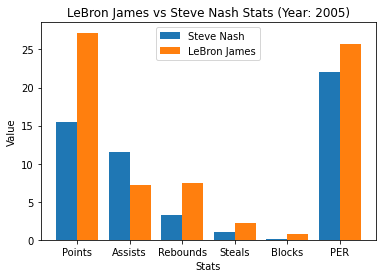

Steve Nash - 2006 MVP Stats
Points: 18.8
Assists: 10.5
Rebounds: 4.2
Steals: 0.8
Blocks: 0.2
PER: 23.29


LeBron James - 2006 Stats
Points: 31.4
Assists: 6.6
Rebounds: 7.0
Steals: 1.6
Blocks: 0.8
PER: 28.17




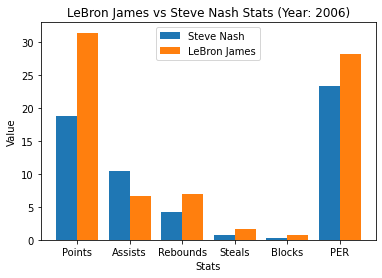

Dirk Nowitzki - 2007 MVP Stats
Points: 24.6
Assists: 3.4
Rebounds: 8.9
Steals: 0.7
Blocks: 0.8
PER: 27.7


LeBron James - 2007 Stats
Points: 27.3
Assists: 6.0
Rebounds: 6.7
Steals: 1.6
Blocks: 0.7
PER: 24.56




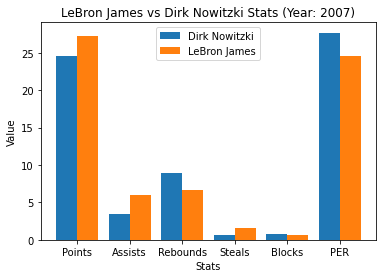

Kobe Bryant - 2008 MVP Stats
Points: 28.3
Assists: 5.4
Rebounds: 6.3
Steals: 1.8
Blocks: 0.5
PER: 24.09


LeBron James - 2008 Stats
Points: 30.0
Assists: 7.2
Rebounds: 7.9
Steals: 1.8
Blocks: 1.1
PER: 29.15




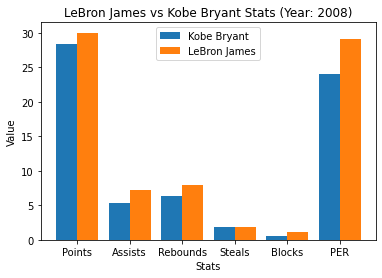

Derrick Rose - 2011 MVP Stats
Points: 25.0
Assists: 7.7
Rebounds: 4.1
Steals: 1.0
Blocks: 0.6
PER: 23.62


LeBron James - 2011 Stats
Points: 26.7
Assists: 7.0
Rebounds: 7.5
Steals: 1.6
Blocks: 0.6
PER: 27.34




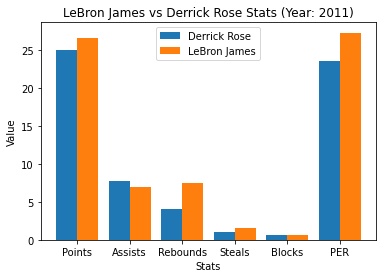

Kevin Durant - 2014 MVP Stats
Points: 32.0
Assists: 5.5
Rebounds: 7.4
Steals: 1.3
Blocks: 0.7
PER: 29.9


LeBron James - 2014 Stats
Points: 27.1
Assists: 6.4
Rebounds: 6.9
Steals: 1.6
Blocks: 0.3
PER: 29.4




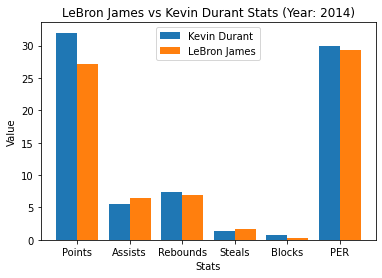

Stephen Curry - 2015 MVP Stats
Points: 23.8
Assists: 7.7
Rebounds: 4.3
Steals: 2.0
Blocks: 0.2
PER: 28.06


LeBron James - 2015 Stats
Points: 25.3
Assists: 7.4
Rebounds: 6.0
Steals: 1.6
Blocks: 0.7
PER: 26.01




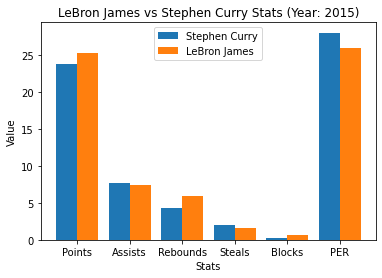

Stephen Curry - 2016 MVP Stats
Points: 30.1
Assists: 6.7
Rebounds: 5.4
Steals: 2.1
Blocks: 0.2
PER: 31.56


LeBron James - 2016 Stats
Points: 25.3
Assists: 6.8
Rebounds: 7.4
Steals: 1.4
Blocks: 0.6
PER: 27.64




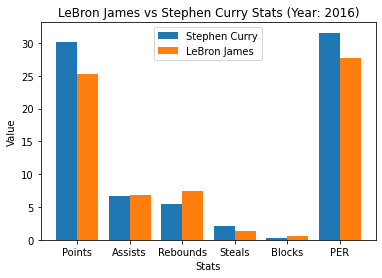

Russell Westbrook - 2017 MVP Stats
Points: 31.6
Assists: 10.4
Rebounds: 10.7
Steals: 1.6
Blocks: 0.4
PER: 30.7


LeBron James - 2017 Stats
Points: 26.4
Assists: 8.7
Rebounds: 8.6
Steals: 1.2
Blocks: 0.6
PER: 27.11




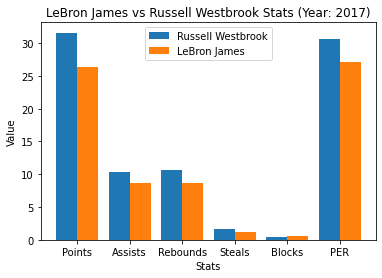

James Harden - 2018 MVP Stats
Points: 30.4
Assists: 8.8
Rebounds: 5.4
Steals: 1.8
Blocks: 0.7
PER: 29.87


LeBron James - 2018 Stats
Points: 27.5
Assists: 9.1
Rebounds: 8.6
Steals: 1.4
Blocks: 0.9
PER: 28.65




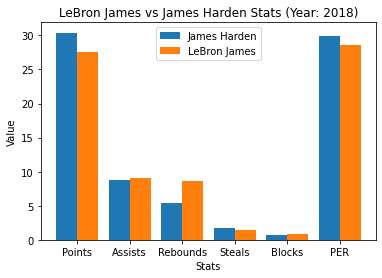

Giannis Antetokounmpo - 2019 MVP Stats
Points: 27.7
Assists: 5.9
Rebounds: 12.5
Steals: 1.3
Blocks: 1.5
PER: 30.95


LeBron James - 2019 Stats
Points: 0.0
Assists: 0.0
Rebounds: 0.0
Steals: 0.0
Blocks: 0.0
PER: 0.0




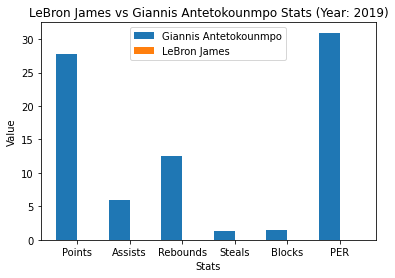

Giannis Antetokounmpo - 2020 MVP Stats
Points: 29.5
Assists: 5.6
Rebounds: 13.6
Steals: 1.0
Blocks: 1.0
PER: 31.94


LeBron James - 2020 Stats
Points: 25.3
Assists: 10.2
Rebounds: 7.8
Steals: 1.2
Blocks: 0.5
PER: 25.55




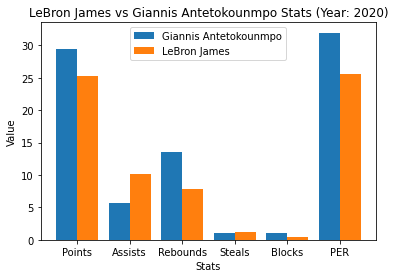

In [6]:
# =============================================================================
# Robel's Code
# =============================================================================



#Sadawi, N. (Director). (2016, December 28). 34- Pandas DataFraames: Aggregation [Video file]. Retrieved March 26, 2021, from https://www.youtube.com/watch?v=2I2E1ZbF8pg&amp;ab_channel=NoureddinSadawi
#Markham, K. (Director). (2016, May 19). When should i use a "groupby" in pandas? [Video file]. Retrieved March 26, 2021, from https://www.youtube.com/watch?v=qy0fDqoMJx8&amp;t=228s&amp;ab_channel=DataSchool
#Patel, D. (Director). (2017, March 26). Python Pandas Tutorial 7. Group By (Split Apply Combine) [Video file]. Retrieved March 26, 2021, from https://www.youtube.com/watch?v=Wb2Tp35dZ-I&amp;t=371s&amp;ab_channel=codebasics

# original = sys.stdout
# sys.stdout = open('NBA Queries', 'a')

## -- DATA CLEANING -- ##

print(len(df)) # Checks current size of the dataset
df = df.drop_duplicates() # Drops any duplicate rows in teh data
print(len(df)) # Checks dataset size after dropping duplicates (there are no duploicates)
df = df.dropna() # Drops any rows with missing data (there is no missing data)


## - START DATA QUERIES -- ##

pd.set_option('display.max_rows', None) # How to print an entire pandas DataFrame in Python. (n.d.). Retrieved April 06, 2021, from https://www.kite.com/python/answers/how-to-print-an-entire-pandas-dataframe-in-python



# Create a starting 5 based on points, rebounds, assists, blocks, and player efficiency

# -- Find the player with the highest average PPG in the data set -- #

myTopFive = []
myTopPoints = 0
myTopRebs = 0
myTopAssists = 0
myTopBlocks = 0
myTopPER = 0

maxPoints = 0 # Set the max PPG to 0
i = 0 # Counter to grab row in dataset for loops
maxI = 0 # Counter to hold the index of the data needed
for points in df['Points Per Game']: # Loops through the PPG column to find what the highest PPG in the dataset is

	if points > maxPoints: # If the current PPG has a higher PPG than the current max value, then set the current PPG as the max
		maxPoints = points
		maxI = i
	i += 1

myTopPoints = float(maxPoints)

i = 0
playerName = ""
for name in df['Player Name']: # Loops through to find the name of the player with the highest average PPG in the dataset
	
	if i == maxI:
		playerName = name
		myTopFive.append(playerName) # Add the player to the top 5 list
		i = 0		
		break
		
	i += 1

playerPos = ""
for position in df['Position']: # Loops through to find the position of the player with the highest average PPG
	
	if i == maxI:
		playerPos = position
		i = 0
		break 
	i += 1

theSeason1 = 0
theSeason2 = 0
for season in df['Season']: # Loops through to find the season in which the player scored the highest PPG

	if i == maxI:
		int(season) # Convert to an integer
		theSeason1 = season - 1 # Finding the year the season started
		theSeason2 = season # Finding the year the season ended
		i = 0
		break
	i += 1

print("The top player selected for points was " + playerName + " who averaged " + str(maxPoints) + " points per game in the " + str(theSeason1) + "-" + str(theSeason2) + " season as a " + playerPos)

# -- Find the player with the highest average RPG in the data set -- #

# Source: Used class resources/notes/slides (Module 6 Visualization and Visualization.ipynb)
# Source: Gavande, J. (2020, April 30). Box plot in Python using matplotlib. Retrieved March 20, 2021, from https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/
plt.boxplot(df['Points Per Game'])
plt.title("Points Per Game")
plt.ylabel("Points")
plt.show()

plt.boxplot(df['Rebounds Per Game'])
plt.title("Rebounds Per Game")
plt.ylabel("Rebounds")
plt.show()

plt.boxplot(df['Assists Per Game'])
plt.title("Assists Per Game")
plt.ylabel("Assists")
plt.show()

plt.boxplot(df['Blocks Per Game'])
plt.title("Blocks Per Game")
plt.ylabel("Blocks")
plt.show()

plt.boxplot(df['Player Efficiency Rating'])
plt.title("Player Efficiency Rating (PER)")
plt.ylabel("PER")
plt.show()

maxReb = 0 # Set the max RPG to 0
i = 0 # Resets counter to grab row in dataset for loops
maxI = 0 # Counter to hold the index of the data needed
for reb in df['Rebounds Per Game']: # Loops through the RPG column to find what the highest PPG in the dataset is

	if reb > maxReb: # If the current RPG has a higher RPG than the current max value, then set the current PPG as the max
		maxReb = reb
		maxI = i
	i += 1

myTopRebs = float(maxReb)

i = 0
playerName = ""
for name in df['Player Name']: # Loops through to find the name of the player with the highest average RPG in the dataset
	
	if i == maxI:
		playerName = name
		myTopFive.append(playerName) # Add the player to the top 5 list
		i = 0		
		break
		
	i += 1

playerPos = ""
for position in df['Position']: # Loops through to find the position of the player with the highest average RPG
	
	if i == maxI:
		playerPos = position
		i = 0
		break 
	i += 1

theSeason1 = 0
theSeason2 = 0
for season in df['Season']: # Loops through to find the season in which the player scored the highest RPG

	if i == maxI:
		int(season) # Convert to an integer
		theSeason1 = season - 1 # Finding the year the season started
		theSeason2 = season # Finding the year the season ended
		i = 0
		break
	i += 1

print("The top player selected for rebounds was " + playerName + " who averaged " + str(maxReb) + " rebounds per game in the " + str(theSeason1) + "-" + str(theSeason2) + " season as a " + playerPos)


#-- Find the player with the highest average APG in the data set --#

maxAssist = 0 # Holds the maximum number of average assits int he dataset
i = 0 # Resets counter to 0
maxI = 0
for assist in df['Assists Per Game']: # Loops through the data set to determine what the highest average assists per game is

	if assist > maxAssist: # Compares the current assist value to the max value; if the current value is higher then set it as the maximum
		maxAssist = assist
		maxI = i
	i += 1

myTopAssists = float(maxAssist)

i = 0 # Reset counter back to 0
playerName = "" # Will hold the name of the player we are looking for
for name in df['Player Name']: # Find the name of the player with the highest assists per game in the dataset
	if i == maxI:
		playerName = name
		myTopFive.append(playerName)
		i = 0		
		break
		
	i += 1

playerPos = "" # Will hold the position of the player we are looking for
for position in df['Position']: # Finds the position of the palyer with the highest assists per gaem
	
	if i == maxI:
		playerPos = position
		i = 0
		break 
	i += 1

theSeason1 = 0 # Start year of the season
theSeason2 = 0 # Finish year of the season
for season in df['Season']:

	if i == maxI:
		int(season) # Caste as an integer
		theSeason1 = season - 1 # Find the start year of the season
		theSeason2 = season # Find the finish year of the season
		i = 0 # Reset counter
		break
	i += 1

print("The top player selected for assists was " + playerName + " who averaged " + str(maxAssist) + " assists per game in the " + str(theSeason1) + "-" + str(theSeason2) + " season as a " + playerPos)

#-- Find the player with the highest average BPG in the data set --#

maxBlocks = 0 # Set the max BPG to 0
i = 0 # Resets counter to grab row in dataset for loops
maxI = 0 # Counter to hold the index of the data needed
for blocks in df['Blocks Per Game']: # Loops through the BPG column to find what the highest BPG in the dataset is

	if blocks > maxBlocks: # If the current BPG has a higher BPG than the current max value, then set the current BPG as the max
		maxBlocks = blocks
		maxI = i
	i += 1

myTopBlocks = float(maxBlocks)

i = 0
playerName = ""
for name in df['Player Name']: # Loops through to find the name of the player with the highest average BPG in the dataset
	
	if i == maxI:
		playerName = name
		myTopFive.append(playerName) # Add the player to the top 5 list
		i = 0		
		break
		
	i += 1

playerPos = ""
for position in df['Position']: # Loops through to find the position of the player with the highest average BPG
	
	if i == maxI:
		playerPos = position
		i = 0
		break 
	i += 1

theSeason1 = 0
theSeason2 = 0
for season in df['Season']: # Loops through to find the season in which the player scored the highest BPG

	if i == maxI:
		int(season) # Convert to an integer
		theSeason1 = season - 1 # Finding the year the season started
		theSeason2 = season # Finding the year the season ended
		i = 0
		break
	i += 1

print("The top player selected for blocks was " + playerName + " who averaged " + str(maxBlocks) + " blocks per game in the " + str(theSeason1) + "-" + str(theSeason2) + " season as a " + playerPos)

#-- Find the player with the highest Player Efficiency Rating (PER) in the data set --#

maxPER = 0 # Set the max PER to 0
i = 0 # Resets counter to grab row in dataset for loops
maxI = 0 # Counter to hold the index of the data needed
for per in df['Player Efficiency Rating']: # Loops through the PER column to find what the highest PER in the dataset is

	if per > maxPER: # If the current PER has a higher PER than the current max value, then set the current PER as the max
		maxPER = per
		maxI = i
	i += 1

myTopPER = float(maxPER)


i = 0
playerName = ""
for name in df['Player Name']: # Loops through to find the name of the player with the highest average PER in the dataset
	
	if i == maxI:
		playerName = name
		myTopFive.append(playerName) # Add the player to the top 5 list
		i = 0		
		break
		
	i += 1

playerPos = ""
for position in df['Position']: # Loops through to find the position of the player with the highest average PER
	
	if i == maxI:
		playerPos = position
		i = 0
		break 
	i += 1

theSeason1 = 0
theSeason2 = 0
for season in df['Season']: # Loops through to find the season in which the player scored the highest PER

	if i == maxI:
		int(season) # Convert to an integer
		theSeason1 = season - 1 # Finding the year the season started
		theSeason2 = season # Finding the year the season ended
		i = 0
		break
	i += 1

print("The top player selected for PER was " + playerName + " who had a " + str(maxPER) + " PER in the " + str(theSeason1) + "-" + str(theSeason2) + " season as a " + playerPos)

print("Based on the dataset and using the criteria of PPG, RPG, APG, BPG, and PER, the 5 players on my team would be " + myTopFive[0] + ", " + myTopFive[1] + ", " + myTopFive[2] + ", " + myTopFive[3] + ", "+ myTopFive[4])


## -- Since the 2001-2002 season, have all the MVPs been in the top 10 list for scoreres? -- ##

mvps = ["Tim Duncan", "Tim Duncan", "Kevin Garnett", "Steve Nash", "Steve Nash", "Dirk Nowitzki", "Kobe Bryant", "LeBron James", "LeBron James", "Derrick Rose", "LeBron James", "LeBron James", "Kevin Durant", "Stephen Curry", "Stephen Curry", "Russell Westbrook", "James Harden", "Giannis Antetokounmpo", "Giannis Antetokounmpo"]
mvpYear = {}
i = 0
for year in years:

	mvpYear[mvps[i]] = years[i]
	i += 1

## -- Should Lebron have more MVPs based on his stats during the MVP seasons (b/w 2011 and 2020 where he didn't win? -- #

count = 0 # Counter for years
theMVPStats = [] # Will hold the relevant stats for the MVP of the observed season
theLebronStats = [] # Will hold the relevant stats for Lebron of the observed season
theMVPList = []

# Loop goes through the list of MVPs of each year of our data set
# Grabs the points, assists, rebounds, steals, blocks, and PER of the MVP
# Skips any year where Lebron was the MVP
# Reports the same info gathered for the MVP (when not Lebron) for Lebron in non-MVP seasons
# Displays bar plots for each stat to compare Lebron and the MVP that season to see how they compare
for mvp in mvps:


	if mvp != "LeBron James" and years[count] > 2003:

		theMVPList.append(mvp)
		theMVP = df[df['Player Name'] == mvp]
		theMVP = theMVP[theMVP['Season'] == years[count]]
		print(mvp + " - " + str(years[count]) + " MVP Stats")
		print("Points: " + str(theMVP['Points Per Game'].sum()))
		print("Assists: " + str(theMVP['Assists Per Game'].sum()))
		print("Rebounds: " + str(theMVP['Rebounds Per Game'].sum()))
		print("Steals: " + str(theMVP['Steals Per Game'].sum()))
		print("Blocks: " + str(theMVP['Blocks Per Game'].sum()))
		print("PER: " + str(theMVP['Player Efficiency Rating'].sum()))
		print('\n')

		theMVPStats.append(theMVP['Points Per Game'].sum())
		theMVPStats.append(theMVP['Assists Per Game'].sum())
		theMVPStats.append(theMVP['Rebounds Per Game'].sum())
		theMVPStats.append(theMVP['Steals Per Game'].sum())
		theMVPStats.append(theMVP['Blocks Per Game'].sum())		
		theMVPStats.append(theMVP['Player Efficiency Rating'].sum())

		lebron = df[df['Player Name'] == "LeBron James"]
		lebron = lebron[lebron['Season'] == years[count]]
		print("LeBron James" + " - " + str(years[count])+ " Stats")
		print("Points: " + str(lebron['Points Per Game'].sum()))
		print("Assists: " + str(lebron['Assists Per Game'].sum()))
		print("Rebounds: " + str(lebron['Rebounds Per Game'].sum()))
		print("Steals: " + str(lebron['Steals Per Game'].sum()))
		print("Blocks: " + str(lebron['Blocks Per Game'].sum()))
		print("PER: " + str(lebron['Player Efficiency Rating'].sum()))
		print('\n')

		theLebronStats.append(lebron['Points Per Game'].sum())
		theLebronStats.append(lebron['Assists Per Game'].sum())
		theLebronStats.append(lebron['Rebounds Per Game'].sum())
		theLebronStats.append(lebron['Steals Per Game'].sum())
		theLebronStats.append(lebron['Blocks Per Game'].sum())
		theLebronStats.append(lebron['Player Efficiency Rating'].sum())

		# Source: Python bar plot - visualize categorical data in python. (2020, September 28). Retrieved April 14, 2021, from https://www.askpython.com/python/python-bar-plot
		# Source: Used class resources/notes/slides (Module 6 Visualization and Visualization.ipynb)
		# Source: Sadawi, N. (2016, December 28). 47- pandas Dataframes: Generating bar and line plots. Retrieved April 14, 2021, from https://www.youtube.com/watch?v=LHeNrY1jGO8&amp;t=260s&amp;ab_channel=NoureddinSadawi
		theStatNames = ["Points", "Assists", "Rebounds", "Steals", "Blocks", "PER"]
		xAxis = np.arange(len(theStatNames))
		# Source: Nalla, G. (2021, February 25). Plotting multiple bar charts using matplotlib in Python. Retrieved April 14, 2021, from https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/
		plt.bar(xAxis - 0.2, theMVPStats, 0.4, label = mvp)
		plt.bar(xAxis + 0.2, theLebronStats, 0.4, label = "LeBron James")
		plt.xticks(xAxis, theStatNames)
		plt.xlabel("Stats")
		plt.ylabel("Value")
		plt.title("LeBron James vs " + mvp + " Stats (Year: " + str(years[count]) + ")")
		plt.legend()
		plt.show()

	count += 1
	theMVPStats = []
	theLebronStats = []


In [7]:
### Amber's Code ###

# Ask user for input (lower case and strip response)
askPlayer = input("What player statistics do you want? ").lower().strip() 
# Create column in df with player's name also lower cased
df['name'] = df['Player Name'].str.lower()
# Create new data frame for when the player asked for is in the original dataframe
playerdf = df[df.name == askPlayer] 

# Length of this new dataframe
length = len(playerdf)

# If the length of the new dataframe is greater than 1 then the player is in the list of top 50
if length >= 1:
    # First year the player was in the top 50
    firstyear = playerdf.iloc[0]['Season']

    # Last year the player was in the top 50
    lastyear = playerdf.iloc[length -1]['Season']

    # First position of the player (rename the acronym into words)
    firstpos = playerdf.iloc[0]['Position']
    if firstpos == 'G':
      firstpos = 'guard'
    if firstpos == 'PG':
      firstpos = 'point guard'
    if firstpos == 'SG':
      firstpos = 'shooting guard'
    if firstpos == 'F':
      firstpos = 'forward'
    if firstpos == 'SF':
      firstpos = 'small forward' 
    if firstpos == 'PF':
      firstpos = 'power forward'
    if firstpos == 'C':
      firstpos = 'center'

    # Last position of the player (rename the acronym into words)
    lastpos = playerdf.iloc[length -1]['Position']
    if lastpos == 'G':
      lastpos = 'guard'
    if lastpos == 'PG':
      lastpos = 'point guard'
    if lastpos == 'SG':
      lastpos = 'shooting guard'
    if lastpos == 'F':
      lastpos = 'forward'
    if lastpos == 'SF':
      lastpos = 'small forward' 
    if lastpos == 'PF':
      lastpos = 'power forward'
    if lastpos == 'C':
      lastpos = 'center'

    # Average number of games played
    meangames = round(playerdf['Games Played'].mean(), 2)
    
    # Average number of points scored
    meanpoints = round(playerdf['Points Per Game'].mean(), 2)

    # Print statements of statistics on players
    print('From 2002 to 2020,', askPlayer, 'has been ranked in the top 50 list of NBA players', length, 'times')
    print('He first made the top 50 list in',  firstyear, 'as a', firstpos, 'and last made the list in', lastyear, 'as a', lastpos)
    print('For the years he made the list, he played on average', meangames, 'games and averaged', meanpoints, 'points per game')

# If the length of the new dataframe is less than 1 then the player does not exist
else:
    print("There is no player with that name.")
    
# Create new dataframe with specified columns
dfnew = df.copy()
dfnew = dfnew.drop(columns =['Cities', 'Position', 'Season', 'Games Played', 'Minutes Played Per Game', 'Average Field Goals made', 'Average Field Goals Attempted', 'Average 3-Point Field Goals Made', 'Average 3-Point Field Goals Attempted', 'Average Free Throws Made', 'Average Free Throws Attempted', 'Turnovers Per Game', 'Double Double', 'Triple Double', 'Player Efficiency Rating', 'name'])
# Groupby player names by overall averages of each category to two decimals (each player is only displayed once)
dfnew = round(dfnew.groupby(['Player Name']).mean(), 2)

# Create new columns with the rank value within each category (eg player with most average points per game ranked 1, second average ranked 2)
dfnew['PointsRank'] = dfnew['Points Per Game'].rank(method='min',ascending = False)
dfnew['FGPercentRank'] = dfnew['Field Goal Percentage'].rank(method='min',ascending = False)
dfnew['ThreePointPercentRank'] = dfnew['3-Point Field Goal Percentage'].rank(method='min',ascending = False)
dfnew['FTPercentRank'] = dfnew['Free Throw Percentage'].rank(method='min',ascending = False)
dfnew['ReboundsRank'] = dfnew['Rebounds Per Game'].rank(method='min',ascending = False)
dfnew['AssistsRank'] = dfnew['Assists Per Game'].rank(method='min',ascending = False)
dfnew['StealsRank'] = dfnew['Steals Per Game'].rank(method='min',ascending = False)
dfnew['BlocksRank'] = dfnew['Blocks Per Game'].rank(method='min',ascending = False)


# Create new dataframe only displaying the ranked values
dfrank = dfnew.copy()
dfrank = dfrank.drop(columns =['Points Per Game', 'Field Goal Percentage', '3-Point Field Goal Percentage', 'Free Throw Percentage', 'Rebounds Per Game', 'Assists Per Game', 'Steals Per Game', 'Blocks Per Game'])

# Create new column averaging their ranked values across all categories
dfrank['Average Rank'] = round(dfrank.mean(axis=1),2)


# Create new dataframe displaying only the Average Ranked values in ascending order
averagerank = dfrank.copy()
averagerank = averagerank.drop(columns =['PointsRank', 'FGPercentRank', 'ThreePointPercentRank', 'FTPercentRank', 'ReboundsRank', 'AssistsRank', 'StealsRank','BlocksRank'])
averagerank.sort_values(['Average Rank']).head(10)

# Create list of years for duration of dataset
years = [2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
# Create empty dataframe
fullrankdf = pd.DataFrame()

# For loop through list of years to create one Full Rank List
for year in years:
  # Create new dataframe with specified columns
  yeardf = df.copy()
  yeardf = yeardf.drop(columns =['Games Played', 'Minutes Played Per Game', 'Average Field Goals made', 'Average Field Goals Attempted', 'Average 3-Point Field Goals Made', 'Average 3-Point Field Goals Attempted', 'Average Free Throws Made', 'Average Free Throws Attempted', 'Turnovers Per Game', 'Double Double', 'Triple Double', 'Player Efficiency Rating', 'name'])
  # Only filter for specified year
  yeardf = yeardf[(yeardf['Season'] == year)]
  # Create new columns with the rank value within each category (eg player with most average points per game ranked 1, second average ranked 2)
  yeardf['PointsRank'] = yeardf['Points Per Game'].rank(method='min',ascending = False)
  yeardf['FGPercentRank'] = yeardf['Field Goal Percentage'].rank(method='min',ascending = False)
  yeardf['ThreePointPercentRank'] = yeardf['3-Point Field Goal Percentage'].rank(method='min',ascending = False)
  yeardf['FTPercentRank'] = yeardf['Free Throw Percentage'].rank(method='min',ascending = False)
  yeardf['ReboundsRank'] = yeardf['Rebounds Per Game'].rank(method='min',ascending = False)
  yeardf['AssistsRank'] = yeardf['Assists Per Game'].rank(method='min',ascending = False)
  yeardf['StealsRank'] = yeardf['Steals Per Game'].rank(method='min',ascending = False)
  yeardf['BlocksRank'] = yeardf['Blocks Per Game'].rank(method='min',ascending = False)
  # Create new dataframe only displaying the ranked values
  newdfrank = yeardf.copy()
  newdfrank = yeardf.drop(columns =['Points Per Game', 'Field Goal Percentage', '3-Point Field Goal Percentage', 'Free Throw Percentage', 'Rebounds Per Game', 'Assists Per Game', 'Steals Per Game', 'Blocks Per Game'])
  # Create new column averaging their ranked values across all categories
  newdfrank['Average Rank'] = round(newdfrank[['PointsRank', 'FGPercentRank', 'ThreePointPercentRank', 'FTPercentRank', 'ReboundsRank', 'AssistsRank', 'StealsRank', 'BlocksRank']].mean(axis=1),2)
  # Sort the Average Ranked values in ascending order (lower average means higher ranks)
  newdfrank = newdfrank.sort_values(['Average Rank'], ascending = True)
  # Only display first 5 values
  newdfrank = newdfrank.head()
  # Append these first five values to the empty dataframe
  fullrankdf = fullrankdf.append(newdfrank)

# To view full list of all the top five players each year and their rank values
pd.set_option('display.max_rows', None)
fullrankdf

# Ask user for input (lower case and strip response)
askyear = input("What year do you want to see the top 5 players? ") #Ask for user input 
stringYears = str(years)

if askyear not in stringYears: # If a non-integer value or a year not in our data set is not provided, code will provide stats from the last season in the data set (2020)
	print("Invalid year. Stats for 2020 season will be provdied instead.")
	askyear = 2020

# Create a new dataframe with only the Average Rank and the year specified by user
inputyeardf = fullrankdf.copy()
inputyeardf = inputyeardf.drop(columns =['PointsRank', 'FGPercentRank', 'ThreePointPercentRank', 'FTPercentRank', 'ReboundsRank', 'AssistsRank', 'StealsRank','BlocksRank'])
inputyeardf = inputyeardf[(inputyeardf['Season'] == int(askyear))]
# Display the dataframe indicating the 2top 5 players for that year
if len(inputyeardf) == 5:
  print(inputyeardf)
else:
  print('Invalid year')


What player statistics do you want?  LeBron James


From 2002 to 2020, lebron james has been ranked in the top 50 list of NBA players 16 times
He first made the top 50 list in 2004 as a small forward and last made the list in 2020 as a small forward
For the years he made the list, he played on average 75.62 games and averaged 27.03 points per game


What year do you want to see the top 5 players?  seg


Invalid year. Stats for 2020 season will be provdied instead.
        Player Name Cities Position  Season  Average Rank
907   Kawhi Leonard    LAC       SF    2020         12.88
900    James Harden    HOU       SG    2020         13.25
902  Damian Lillard    POR       PG    2020         15.25
909   Anthony Davis    LAL       PF    2020         15.38
928    Nikola Jokic    DEN        C    2020         17.62


In [8]:

import unittest
#from finalProjectCode import * 

# Used unittest library to conduct unit testing 
# Used appropriate format to conduct unit testing (writing test in file name, unittest.TestCase, etc.)
# Used asssertEquals to determine if th correct max value for the obsereved categories for points, rebounds, assists, blocks, and PER in the Top-5 starting analysis was collected
# Used assertEquals to determine that the correct players associated with the max value were found
# Used assertEquals to determine that the correct MVPs in each obsereved season were collected for the LeBron James vs MVP analysis 

class TestProject(unittest.TestCase):

	def test_top_Points(self): # Test to find max value of points in data set using assertEqual

		self.assertEqual(maxPoints, 36.1)

	def test_top_Rebs(self): # Test to find max value of rebounds in data using assertEqual

		self.assertEqual(maxReb, 15.6)	

	def test_top_Assists(self): # Test to find max value of assists in data set using assertEqual

		self.assertEqual(maxAssist, 11.6)

	def test_top_Blocks(self): # Test to find max value of blocks in data set using assertEqual

		self.assertEqual(maxBlocks, 2.9)

	def test_top_PER(self): # Test to find max value of PER using assertEqual

		self.assertEqual(maxPER, 31.94)

	def test_PPG_Leader(self): # Test to find player with max points using assertEqual

		self.assertEqual(myTopFive[0], "James Harden")

	def test_RPG_Leader(self): # Test to find player with max rebounds using assertEqual

		self.assertEqual(myTopFive[1], "Andre Drummond")

	def test_APG_Leader(self): # Test to find player with max assists using assertEqual

		self.assertEqual(myTopFive[2], "Steve Nash")

	def test_BPG_Leader(self): # Test to find player with max blocks using assertEqual

		self.assertEqual(myTopFive[3], "Tim Duncan")

	def test_PER_Leader(self): # Test to find player with max PER using assertEqual

		self.assertEqual(myTopFive[4], "Giannis Antetokounmpo")

	def test_MVP0(self): # Test to find the first MVP of our observed seasons using assertEquals

		self.assertEqual(theMVPList[0], "Kevin Garnett")

	def test_MVP1(self): # Test to find the second MVP of our observed seasons using assertEquals

		self.assertEqual(theMVPList[1], "Steve Nash")

	def test_MVP2(self): # Test to find the third MVP of our observed seasons using assertEquals

		self.assertEqual(theMVPList[2], "Steve Nash")

	def test_MVP3(self): # Test to find the fourth MVP of our observed seasons using assertEquals

		self.assertEqual(theMVPList[3], "Dirk Nowitzki")

	def test_MVP4(self): # Test to find the fifth MVP of our observed seasons using assertEquals

		self.assertEqual(theMVPList[4], "Kobe Bryant")

	def test_MVP5(self): # Test to find the sixth MVP of our observed seasons using assertEquals

		self.assertEqual(theMVPList[5], "Derrick Rose")

	def test_MVP6(self): # Test to find the seventh MVP of our observed seasons using assertEquals

		self.assertEqual(theMVPList[6], "Kevin Durant")

	def test_MVP7(self): # Test to find the eighth MVP of our observed seasons using assertEquals

		self.assertEqual(theMVPList[7], "Stephen Curry")

	def test_MVP8(self): # Test to find the ninth MVP of our observed seasons using assertEquals

		self.assertEqual(theMVPList[8], "Stephen Curry")

	def test_MVP9(self): # Test to find the tenth MVP of our observed seasons using assertEquals

		self.assertEqual(theMVPList[9], "Russell Westbrook")

	def test_MVP10(self): # Test to find the eleventh MVP of our observed seasons using assertEquals

		self.assertEqual(theMVPList[10], "James Harden")

	def test_MVP11(self): # Test to find the twelth MVP of our observed seasons using assertEquals

		self.assertEqual(theMVPList[11], "Giannis Antetokounmpo")

	def test_MVP12(self): # Test to find the thirteenth MVP of our observed seasons using assertEquals

		self.assertEqual(theMVPList[12], "Giannis Antetokounmpo")

class PointsSortCheckTestCase (unittest.TestCase):
  # Test if list is sorting properly
  def test_sort_pointspergame(self):
    # Read in the data
    dfcheck = df.copy()
    # Groupby the mean values of each player
    dfcheck = round(dfcheck.groupby(['Player Name']).mean(), 2)

    # Sort the values in order of Points per game
    dfsorted = dfcheck.sort_values(['Points Per Game'], ascending = False)
    
    # Get the first two players on the list
    listall = list(dfsorted.index)
    result1 = listall[0]
    result2 = listall[1]
    # These are the expected values
    expected1 = 'Allen Iverson'
    expected2 = 'James Harden'
    
    # Assert the expected values are equal to the result values
    self.assertEqual(expected1, result1)
    self.assertEqual(expected2, result2)

class FGRankTestCase (unittest.TestCase):
  # Test if rank is working properly
  def test_rank_FGPercent(self):
    # REad in the data
    dffg = df.copy()
    # Groupby the mean values of each player
    dffg = round(dffg.groupby(['Player Name']).mean(), 2)
    # Rank the data in order of Field Goal Percentage
    dffg['FGPercentRank'] = dffg['Field Goal Percentage'].rank(method='min',ascending = False)
    # Sort the values in order of Field Goal Percentage ranked value
    dffgsort = dffg.sort_values(['FGPercentRank'], ascending = True)
    
    # Get the first two players on the list
    listfg = list(dffgsort.index)
    resultone = listfg[0]
    resulttwo = listfg[1]
    # These are the expected values
    expectedone = 'Clint Capela'
    expectedtwo = 'Shaquille O\'Neal'
    
    # Assert the expected values are equal to the result values
    self.assertEqual(expectedone, resultone)
    self.assertEqual(expectedtwo, resulttwo)
    
    
number_of_rows = len(allseasons) #check the number of rows in the allseasons series
numberC = len(C3n) #check the number of rows in the Centers series
numberG = len(G3n) #check the number of rows in the Guards series
numberPG = len(PG3n) #check the number of rows in the Poitn Guards series
numberSG = len(SG3n) #check the number of rows in the Shooting Guards series
numberF = len(F3n) #check the number of rows in the Forwards series
numberSF = len(SF3n) #check the number of rows in the SFs series
numberPF = len(PF3n) #check the number of rows in the Power Forwards series

all = numberC + numberF + numberG + numberPF +numberPG +numberSF+numberSG #find the sum of all of those values

assert number_of_rows == all #assert that the total # of rows equal the sum of all the grouped rows

number_of_rows_final = len(Final) #check the number of rows in the allseasons series
countC = len(C) #check the number of rows in the Cs series
countG = len(G) #check the number of rows in the Gs series
countPG = len(PG) #check the number of rows in the PGs series
countSG = len(SG) #check the number of rows in the SGs series
countF = len(F) #check the number of rows in the Fs series
countSF = len(SF) #check the number of rows in the SFs series
countPF = len(PF) #check the number of rows in the PFs series

assert number_of_rows_final == 19 #assert that the number of rows equals the correct amount

assert countC == 19 #assert that each series has the correct number of rows
assert countG == 19 #assert that each series has the correct number of rows
assert countPG == 19 #assert that each series has the correct number of rows
assert countSG == 19 #assert that each series has the correct number of rows
assert countF == 19 #assert that each series has the correct number of rows
assert countSF == 19 #assert that each series has the correct number of rows
assert countPF == 19#assert that each series has the correct number of rows

#if __name__ == '__main__':
 #   unittest.main()  



unittest.main(argv=[''], exit=False) # Module 5: SW and Debugging class resources











.........................
----------------------------------------------------------------------
Ran 25 tests in 0.026s

OK
